# 2 a) Investigate the performance of a number of machine learning procedures on this dataset.

##### Import Library

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score

##### Load DataSet

In [38]:
# making data frame from csv file
dataset = pd.read_csv("D:\\Machine Learning\CE802_P2_Data\CE802_P2_Data.csv")
dataset.shape
dataset.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,30,186.88,-21.06,-17.68,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,-8.54,510,NaN,False
1,30,196.88,-22.89,-19.38,19.70,353.22,-5.71,-1.48,-18.33,7.15,-8.58,15.89,-8.44,760,7.22,False
2,30,96.88,-19.65,-16.46,17.30,398.22,-5.19,-1.96,-14.64,7.10,-9.18,20.89,-8.79,610,7.69,False
3,3,216.88,-33.24,-27.80,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,-3.78,32,NaN,False
4,3,198.88,-32.52,-26.26,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,-3.25,36,NaN,True


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   int64  
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   int64  
 14  F15     750 non-null    float64
 15  Class   1500 non-null   bool   
dtypes: bool(1), float64(13), int64(2)
memory usage: 177.4 KB


##### Find Missing Values

In [40]:
missing_data = pd.isnull(dataset["F15"])
 
# filtering data
# displayind data only with F15 = NaN
dataset[missing_data]

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,30,186.88,-21.06,-17.68,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,-8.54,510,NaN,False
3,3,216.88,-33.24,-27.80,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,-3.78,32,NaN,False
4,3,198.88,-32.52,-26.26,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,-3.25,36,NaN,True
5,30,386.88,-20.94,-20.34,10.70,533.22,-4.12,-4.22,-8.97,14.50,-11.00,20.89,-9.09,330,NaN,False
8,3,182.88,-32.76,-25.48,1.82,323.22,2.55,-7.31,-17.85,0.99,-20.30,5.89,-3.74,66,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,30,256.88,-18.39,-15.72,18.70,503.22,-5.13,-1.94,-9.75,13.40,-9.50,20.89,-8.59,630,NaN,True
1493,3,164.88,-36.24,-29.68,1.90,302.22,1.26,-9.04,-13.44,1.23,-19.72,7.89,-2.94,2,NaN,False
1494,30,156.88,-20.82,-16.82,16.70,398.22,-5.46,-3.46,-12.60,7.40,-7.32,20.89,-11.14,490,NaN,True
1497,30,106.88,-17.91,-17.48,13.50,623.22,-5.96,-2.59,-13.89,9.40,-7.06,20.89,-11.79,370,NaN,True


##### Missing Values Imputation

In [41]:
# filling data
dataset['F15'] = dataset['F15'].fillna(dataset['F15'].mean()) 
print(dataset)

      F1      F2     F3     F4     F5      F6    F7    F8     F9   F10    F11  \
0     30  186.88 -21.06 -17.68  14.20  563.22 -3.29 -5.32 -18.90  9.20  -9.44   
1     30  196.88 -22.89 -19.38  19.70  353.22 -5.71 -1.48 -18.33  7.15  -8.58   
2     30   96.88 -19.65 -16.46  17.30  398.22 -5.19 -1.96 -14.64  7.10  -9.18   
3      3  216.88 -33.24 -27.80   0.84  344.22 -0.86 -6.89 -14.73  0.09 -17.98   
4      3  198.88 -32.52 -26.26   1.52  278.22  0.08 -7.73 -13.62  1.91 -23.94   
...   ..     ...    ...    ...    ...     ...   ...   ...    ...   ...    ...   
1495  30  266.88 -18.69 -17.30  14.70  383.22 -4.94 -3.05  -9.78  5.95 -14.20   
1496  30  206.88 -22.35 -18.00  12.30  428.22 -3.27 -3.48  -8.46  9.20 -11.56   
1497  30  106.88 -17.91 -17.48  13.50  623.22 -5.96 -2.59 -13.89  9.40  -7.06   
1498  30  336.88 -23.73 -18.68  17.60  503.22 -5.01 -3.72  -7.98  6.50  -8.60   
1499   3  218.88 -34.08 -26.14   1.18  335.22  0.77 -7.68 -15.21  1.43 -25.30   

        F12    F13  F14    

# Decision Tree classifier

##### Create X and Y Metrics

In [42]:
inputs=dataset.drop('Class',axis=1)
target=dataset['Class']

##### Data Split

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [45]:
from sklearn import tree

##### Instantiate Decision Tree Classifier

In [46]:
model = tree.DecisionTreeClassifier(criterion='gini',max_depth=6, min_samples_split=15, class_weight='balanced') # Using the best parameters obtained by Randomsearch

##### Fit the Decision Tree to the training data

In [47]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

##### Do prediction using our test data

In [48]:
y_pred = model.predict(X_test)

##### Calculate the performance of Decision Tree Classifier

Accuracy on test set: 75.667%
Precision on test set: 0.775
Recall on test set: 0.669
F1-Score on test set: 0.718


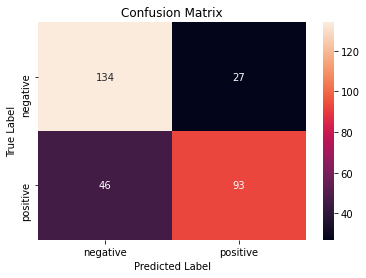

In [49]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Support Vector Classifier

In [50]:
from sklearn.svm import SVC

##### Instantiate Support Vector Classifier

In [51]:
svmclassifier = SVC()

##### Fit the Support Vector to the training data

In [52]:
svmclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

##### Do prediction using our test data

In [53]:
y_pred_svm = svmclassifier.predict(X_test)

##### Calculate the performance of Support Vector Classifier

Accuracy on test set: 80.000%
Precision on test set: 0.788
Recall on test set: 0.777
F1-Score on test set: 0.783


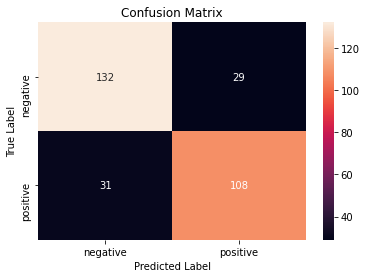

In [54]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred_svm)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred_svm)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred_svm)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred_svm)))

cm = confusion_matrix(y_test, y_pred_svm)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

##### Instantiate Random Forest Classifier

In [56]:
rfclassifier = RandomForestClassifier(n_estimators=40, min_samples_split= 10, max_features= 'auto', max_depth= 5)

##### Fit the Random Forest to the training data

In [57]:
rfclassifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

##### Do prediction using our test data

In [58]:
y_pred_rf = rfclassifier.predict(X_test)

##### Calculate the performance of Random Forest Classifier

Accuracy on test set: 83.000%
Precision on test set: 0.819
Recall on test set: 0.813
F1-Score on test set: 0.816


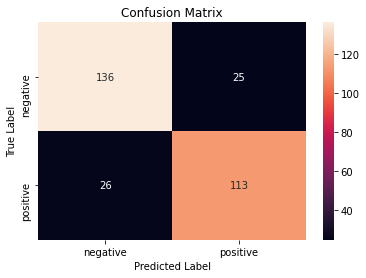

In [59]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred_rf)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred_rf)))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred_rf)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred_rf)))

cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [60]:
from tabulate import tabulate 
   
values1 = {'Algorithm':['Decision Tree Classifier', 'Support Vector Classifier', 'Random Forest Classifier'], 
        'Accuracy':['75.667%','80%' ,'83%'], 
        'Precision':['0.775', '0.788', '0.819'],
        'Recall':['0.669','0.777','0.813'],
        'F1-Score':['0.718','0.783','0.816']
       } 

df2 = pd.DataFrame(values1) 
  
# displaying the DataFrame 
print(tabulate(df2, headers = 'keys', tablefmt = 'psql')) 

+----+---------------------------+------------+-------------+----------+------------+
|    | Algorithm                 | Accuracy   |   Precision |   Recall |   F1-Score |
|----+---------------------------+------------+-------------+----------+------------|
|  0 | Decision Tree Classifier  | 75.667%    |       0.775 |    0.669 |      0.718 |
|  1 | Support Vector Classifier | 80%        |       0.788 |    0.777 |      0.783 |
|  2 | Random Forest Classifier  | 83%        |       0.819 |    0.813 |      0.816 |
+----+---------------------------+------------+-------------+----------+------------+
